# DSE 2262 MACHINE LEARNING LABORATORY


## Week 1 - Excercise -1

#### Dataset Meta-Data about mtcars.csv

### Let us first explore what this dataset is about 

### This is done by going through its meta data.

mtcars: Motor Trend Car Road Tests

**Description:**

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973--74 models).

**Format**

A data frame with 32 observations on 11 (numeric) variables.

[, 1]	mpg	Miles/(US) gallon

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	Engine (0 = V-shaped, 1 = straight)

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[, 10]	gear	Number of forward gears

#### Loading Dataset and Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [26]:
df = pd.read_csv("mtcars.csv")

In [27]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


##### Plotting Scatter-plot to visualize correlation between weight and mpg.

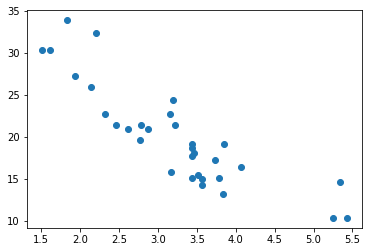

In [28]:
plt.scatter(df['wt'].to_numpy(),df['mpg'].to_numpy())

### Q1. Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.


##### Helper Functions for myFnLinReg(x,y)

In [29]:
def data_iterator(features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    yield features, labels

def linreg(X, w, b):
    return np.dot(X, w) + b

def sgd(w, b, lr,l1,X):
    batch_size = len(X)
    b = b - lr * np.sum(l1) / batch_size
    w = w - lr * np.dot(X.T,l1) / batch_size
    return w,b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))

#### Main code for myFnLinReg(x,y)

We have implemented Batch Gradient Descent

In [30]:
lr = 0.1 #learning rate for gradient descent
num_epochs = 500 #no of epochs for which we will train

def myFnLinReg(X_1, y_1):
    cost_func_graph = []
    w = np.random.normal(0, 0.01, (1, 1))
    b = np.zeros(1)
    for epoch in range(num_epochs):
        for X, y in data_iterator(X_1, y_1):
            l = squared_loss(linreg(X, w, b), y)  
            l1 = loss(linreg(X, w, b), y)
            l2 = np.sum(l1)
            w,b = sgd(w, b, lr,l1,X)
        cost_func_graph.append(float(squared_loss(linreg(X, w, b), y).mean()))
        if epoch%20 == 0:
            train_l = loss(linreg(X_1, w, b), y_1)
            train_l2 = squared_loss(linreg(X, w, b), y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f},cost/loss-mse {float(train_l2.mean()):f}')
    arr = np.array(cost_func_graph)
    print(arr.shape)
    plt.plot(arr)
    plt.show()
    return w,b

### Q2. Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.


Converting dataseries of dataset to numpy array for easier working for further questions

In [31]:
X_1 = df['wt'].to_numpy().reshape(-1,1)
y_1 = df['mpg'].to_numpy().reshape(-1,1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

epoch 1, loss 0.234114,cost/loss-mse 61.132743
epoch 21, loss -2.348034,cost/loss-mse 42.224656
epoch 41, loss -2.007275,cost/loss-mse 31.904539
epoch 61, loss -1.715969,cost/loss-mse 24.362483
epoch 81, loss -1.466939,cost/loss-mse 18.850667
epoch 101, loss -1.254049,cost/loss-mse 14.822571
epoch 121, loss -1.072055,cost/loss-mse 11.878794
epoch 141, loss -0.916473,cost/loss-mse 9.727450
epoch 161, loss -0.783469,cost/loss-mse 8.155224
epoch 181, loss -0.669768,cost/loss-mse 7.006224
epoch 201, loss -0.572568,cost/loss-mse 6.166523
epoch 221, loss -0.489474,cost/loss-mse 5.552859
epoch 241, loss -0.418439,cost/loss-mse 5.104388
epoch 261, loss -0.357713,cost/loss-mse 4.776640
epoch 281, loss -0.305800,cost/loss-mse 4.537118
epoch 301, loss -0.261421,cost/loss-mse 4.362072
epoch 321, loss -0.223482,cost/loss-mse 4.234147
epoch 341, loss -0.191049,cost/loss-mse 4.140658
epoch 361, loss -0.163323,cost/loss-mse 4.072336
epoch 381, loss -0.139621,cost/loss-mse 4.022405
epoch 401, loss -0.1

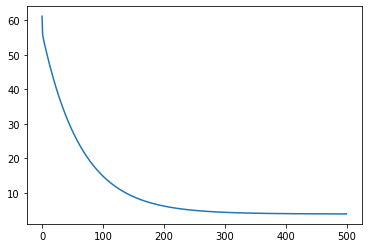

In [33]:
w1,b1 = myFnLinReg(X_train, y_train)

### Q3. What is the mpg of a car, whose weight is 5.5?

In [34]:
y_q3 = (5.5)*(w1) + b1
print(y_q3)

[[8.01577193]]


### Q4. Compute and print accuracy measures such as RMSE and R2 for the test set

In [35]:
def rmse(y_pred,y_hat):
    m = y_pred.shape[0]
    diff = np.sum((y_pred - y_hat)**2)
    loss = (1/m)*((diff))**0.5
    return loss
def r2_score(y_pred,y_hat):
    ssr = np.sum((y_pred - y_hat)**2)
    mean = np.mean(y_hat)
    sst = np.sum((y_hat - mean)**2)
    score = 1- ssr/sst
    return score

In [36]:
y_pred = X_test*(w1) + b1

In [37]:
r2_score(y_pred,y_test)

0.6837841673323214

In [38]:
rmse(y_pred,y_test)

1.3439600157169758

### Q5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

##### Helper Functions for myFnLinReg(x,y)

In [39]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

def linreg(X, w, b):
    return np.dot(X, w) + b
def sgd(w, b, lr, batch_size,l1,X):
    b = b - lr * np.sum(l1) / batch_size
    w = w - lr * np.dot(X.T,l1) / batch_size
    return w,b
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))

#### Main code for myFnLinReg(X,y,batch_size) which can be used for stochastic gradient descent and mini batch gradient descent.

In [40]:
def myFnLinReg2(X,y,batch_size):
    cost_func_graph = []
    w = np.random.normal(0, 0.01, (1, 1))
    b = np.zeros(1)
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, X_1, y_1):
            l = squared_loss(linreg(X, w, b), y)  
            l1 = loss(linreg(X, w, b), y)
            l2 = np.sum(l1)
            w,b = sgd(w, b, lr, batch_size,l1,X)
        cost_func_graph.append(float(squared_loss(linreg(X, w, b), y).mean()))
        if epoch%20 == 0:
            train_l = loss(linreg(X_1, w, b), y_1)
            train_l2 = squared_loss(linreg(X, w, b), y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f},cost/loss-mse {float(train_l2.mean()):f}')
    arr = np.array(cost_func_graph)
    print(arr.shape)
    plt.plot(arr)
    plt.show()
    return w,b

### Mini batch gradient descent

epoch 1, loss -4.860808,cost/loss-mse 56.167095
epoch 21, loss -0.141316,cost/loss-mse 4.414971
epoch 41, loss 0.013397,cost/loss-mse 5.726340
epoch 61, loss 0.330039,cost/loss-mse 9.131362
epoch 81, loss -1.116157,cost/loss-mse 2.693209
epoch 101, loss -1.121150,cost/loss-mse 4.834538
epoch 121, loss -0.564973,cost/loss-mse 2.632838
epoch 141, loss 2.628271,cost/loss-mse 7.560686
(150,)


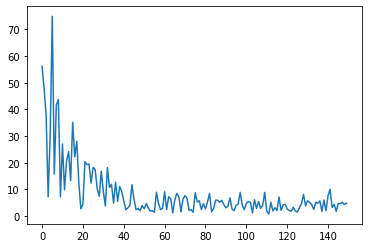

In [41]:
lr = 0.1 #learning rate
num_epochs = 150 #no of epochs
batch_size = 8 #batch size
w1,b1 = myFnLinReg2(X_train, y_train,batch_size)

In [42]:
y_pred = X_test*(w1) + b1

In [43]:
r2_score(y_pred,y_test)

0.728693924761301

In [44]:
rmse(y_pred,y_test)

1.244870863054756

### Stochastic batch gradient descent

epoch 1, loss -5.199812,cost/loss-mse 78.455770
epoch 21, loss -0.717406,cost/loss-mse 3.389534
epoch 41, loss -1.845505,cost/loss-mse 0.088209
epoch 61, loss -1.037530,cost/loss-mse 7.063997
epoch 81, loss -0.516238,cost/loss-mse 0.390168
epoch 101, loss -0.441095,cost/loss-mse 0.000188
epoch 121, loss -0.539829,cost/loss-mse 4.437359
epoch 141, loss -0.508327,cost/loss-mse 0.057336
epoch 161, loss -0.471848,cost/loss-mse 1.565437
epoch 181, loss -0.831185,cost/loss-mse 0.400159
epoch 201, loss -0.054566,cost/loss-mse 1.961382
epoch 221, loss -0.424768,cost/loss-mse 3.837416
epoch 241, loss -0.146698,cost/loss-mse 1.042642
epoch 261, loss 0.019999,cost/loss-mse 0.815928
epoch 281, loss 0.570494,cost/loss-mse 0.022091
epoch 301, loss -0.803811,cost/loss-mse 3.203613
epoch 321, loss -0.154521,cost/loss-mse 1.755844
epoch 341, loss -0.933243,cost/loss-mse 2.632822
epoch 361, loss -0.703712,cost/loss-mse 2.094527
epoch 381, loss 0.485593,cost/loss-mse 0.013180
epoch 401, loss 0.021728,cos

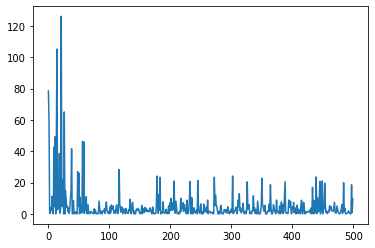

In [45]:
lr = 0.01
num_epochs = 500
w1,b1 = myFnLinReg2(X_train, y_train,1)

In [46]:
y_pred = X_test*(w1) + b1

In [47]:
r2_score(y_pred,y_test)

0.7271880601616756

In [48]:
rmse(y_pred,y_test)

1.2483208649369186